# K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


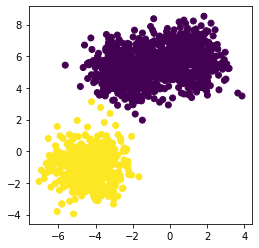

In [7]:
# Incorrect number of clusters
plt.figure(figsize=(4, 4))

n_samples = 1500
X, y = make_blobs(n_samples=n_samples)

y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


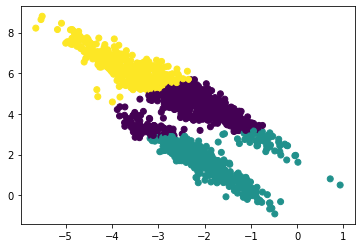

In [8]:
# Non normal data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3).fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Unequal Variance')

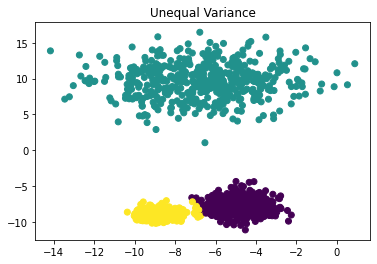

In [9]:
# Different shapes
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],)
y_pred = KMeans(n_clusters=3).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# DBScan

In [10]:
from sklearn.cluster import DBSCAN
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4)

In [12]:
X

array([[-1.01872222, -0.98005113],
       [ 1.43144116,  0.32948775],
       [-1.22775134, -0.90093183],
       ...,
       [ 0.87208509,  1.39139966],
       [ 0.91170877, -1.13664579],
       [ 1.05602055, -0.98530287]])

In [15]:
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

In [16]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [21]:
n_clusters

3

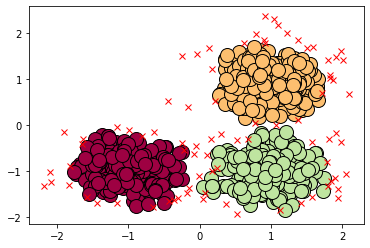

In [22]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'x', markeredgecolor='r', markersize=6)

# Local Outlier Factor

In [25]:
df = pd.read_excel("Telecom - for segmentation.xlsx")
df = df.select_dtypes("number").drop(['ID'], axis=1)

FileNotFoundError: ignored

In [ ]:
df.head()

,REVENUE_TOTAL,REVENUE_VOICE,REVENUE_DATA,TRAFFIC_DATA,MOU
0,11.075,6.562,4.513,0.247,40.250
1,1940.036,1090.420,1.402,0.077,445.882
2,1127.000,631.242,0.000,0.000,333.233
3,142.286,142.286,0.000,0.000,479.000
4,473.233,169.661,44.643,0.000,131.884


In [24]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10, contamination="auto")
pred = clf.fit_predict(df)
scores = clf.negative_outlier_factor_

NameError: ignored

In [23]:
scores

NameError: ignored

In [ ]:
np.unique(pred, return_counts=True)

(array([-1,  1]), array([230, 729], dtype=int64))

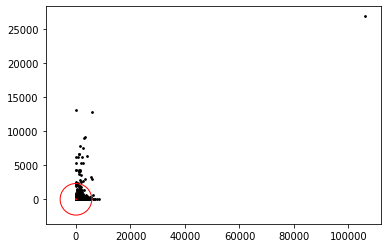

In [ ]:
plt.scatter(df["REVENUE_TOTAL"], df["TRAFFIC_DATA"], color='k', s=3., label='Data points')
radius = (scores.max() - scores) / (scores.max() - scores.min())
plt.scatter(df["REVENUE_TOTAL"], df["TRAFFIC_DATA"], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

In [ ]:
df = df.iloc[np.where(pred == 1)].head()
df.head()

,REVENUE_TOTAL,REVENUE_VOICE,REVENUE_DATA,TRAFFIC_DATA,MOU
1,1940.036,1090.420,1.402,0.077,445.882
4,473.233,169.661,44.643,0.000,131.884
5,1294.849,835.027,0.000,0.000,165.851
6,0.000,0.000,0.000,0.000,263.366
7,279.286,279.286,0.000,0.000,88.651


# Dimensionality reduction - RFE, KBest

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE

df_x = df.drop(["MOU"], axis=1)
df_y = df[["MOU"]]
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2, step=1)
rfe.fit(df_x, df_y.values.ravel())
ranking = rfe.ranking_
support = rfe.support_

In [ ]:
support, ranking

(array([ True, False,  True, False]), array([1, 2, 1, 3]))

In [ ]:
df.iloc[:, support]

,REVENUE_TOTAL,REVENUE_DATA
0,11.075,4.513
1,1940.036,1.402
2,1127.000,0.000
3,142.286,0.000
4,473.233,44.643
5,1294.849,0.000
6,0.000,0.000
7,279.286,0.000
8,1964.260,535.982
9,9.821,0.000


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression
X = df.select_dtypes("number")
y = df['MOU']
kb = SelectKBest(mutual_info_regression, k=2).fit(X, y)
X_new = kb.transform(X)
print(X_new.shape)
print(kb.get_support())

(959, 2)
[ True False False False  True]


In [ ]:
df

# Dimensionality reduction - PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(df)
pca_score = pca.explained_variance_ratio_
V = pca.components_
V

array([[ 0.70586916,  0.013933  ,  0.68244408,  0.18923828,  0.00368074],
       [-0.24265749, -0.29722963,  0.00145761,  0.92254891, -0.04090569]])

In [ ]:
pca_score

array([0.91846938, 0.04250531])

In [ ]:
pca.transform(df)

array([[-864.20007117,  108.82778221],
       [ 511.83318599, -698.15779435],
       [ -69.84757355, -359.85230477],
       ...,
       [ 215.9028257 , -659.59606709],
       [-224.53488283, -390.47221036],
       [-398.12351531, -249.21269632]])